<a href="https://colab.research.google.com/github/Rounak-Das-02/Walmart-Price-Prediction/blob/master/Walmart%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

In [39]:
!git clone https://github.com/Rounak-Das-02/Walmart-Price-Prediction.git

fatal: destination path 'Walmart-Price-Prediction' already exists and is not an empty directory.


In [0]:
train = pd.read_csv("/content/Walmart-Price-Prediction/data/train.csv")

In [41]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [0]:
train["year"] = pd.to_datetime(train["Date"]).dt.year
train["month"] = pd.to_datetime(train["Date"]).dt.month
train["day"] = pd.to_datetime(train["Date"]).dt.day

In [0]:
real_dates = np.array(train["Date"])
train = train.drop("Date" ,axis = 1)

In [44]:
target = train.Weekly_Sales
target

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [0]:
train = train.drop("Weekly_Sales" , axis = 1)

In [46]:
train .head()

,Store,Dept,IsHoliday,year,month,day
0,1,1,False,2010,2,5
1,1,1,True,2010,2,12
2,1,1,False,2010,2,19
3,1,1,False,2010,2,26
4,1,1,False,2010,3,5


In [0]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.2)

In [48]:

joblib.dump(x_train , "to be fit_transformed into the Standard Scaler")

['to be fit_transformed into the Standard Scaler']

In [0]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test , y_pred))

0.9695639116371781


In [0]:
from sklearn.externals import joblib

In [52]:
joblib.dump(rfr , "model.pkl")

['model.pkl']

In [80]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

model = joblib.load("/content/model.pkl")
x_train = joblib.load("/content/to be fit_transformed into the Standard Scaler")


test = pd.read_csv("/content/Walmart-Price-Prediction/data/test.csv")



test["year"] = pd.to_datetime(test["Date"]).dt.year
test["month"] = pd.to_datetime(test["Date"]).dt.month
test["day"] = pd.to_datetime(test["Date"]).dt.day

testing = test.copy()

dates = np.array(test["Date"])

testing = testing.drop("Date" ,axis =1)

sc = StandardScaler()
ty = sc.fit_transform(x_train)
testing  = sc.transform(testing)

output = model.predict(testing)
test["Predicted Weekly_Sales"] = output
test.head()

,Store,Dept,Date,IsHoliday,year,month,day,Predicted Weekly_Sales
0,1,1,2012-11-02,False,2012,11,2,36031.0878
1,1,1,2012-11-09,False,2012,11,9,21354.0536
2,1,1,2012-11-16,False,2012,11,16,20480.9818
3,1,1,2012-11-23,True,2012,11,23,21822.2723
4,1,1,2012-11-30,False,2012,11,30,32490.0809


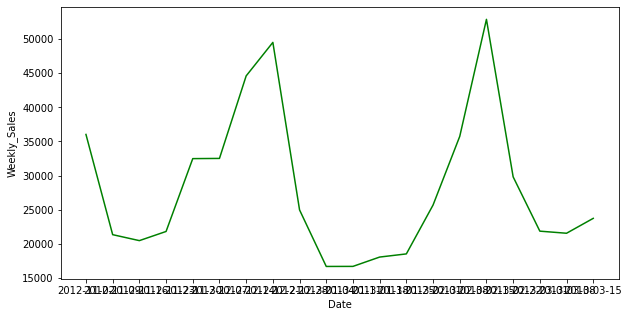

In [81]:
#Weekly sales for 20 weeks
plt.figure(0,figsize = [10,5])
plt.plot(dates[:20] , output[:20] , color = "green")
plt.xlabel("Date" , size = 10)
plt.ylabel("Weekly_Sales" , size = 10)
plt.show()

In [0]:
month = np.array([])
test_month = np.array([])


for i in range(0,dates.size , 4):
  test_month = np.append(test_month , [testing[i]])
  month = np.append(month , [dates[i]])
  



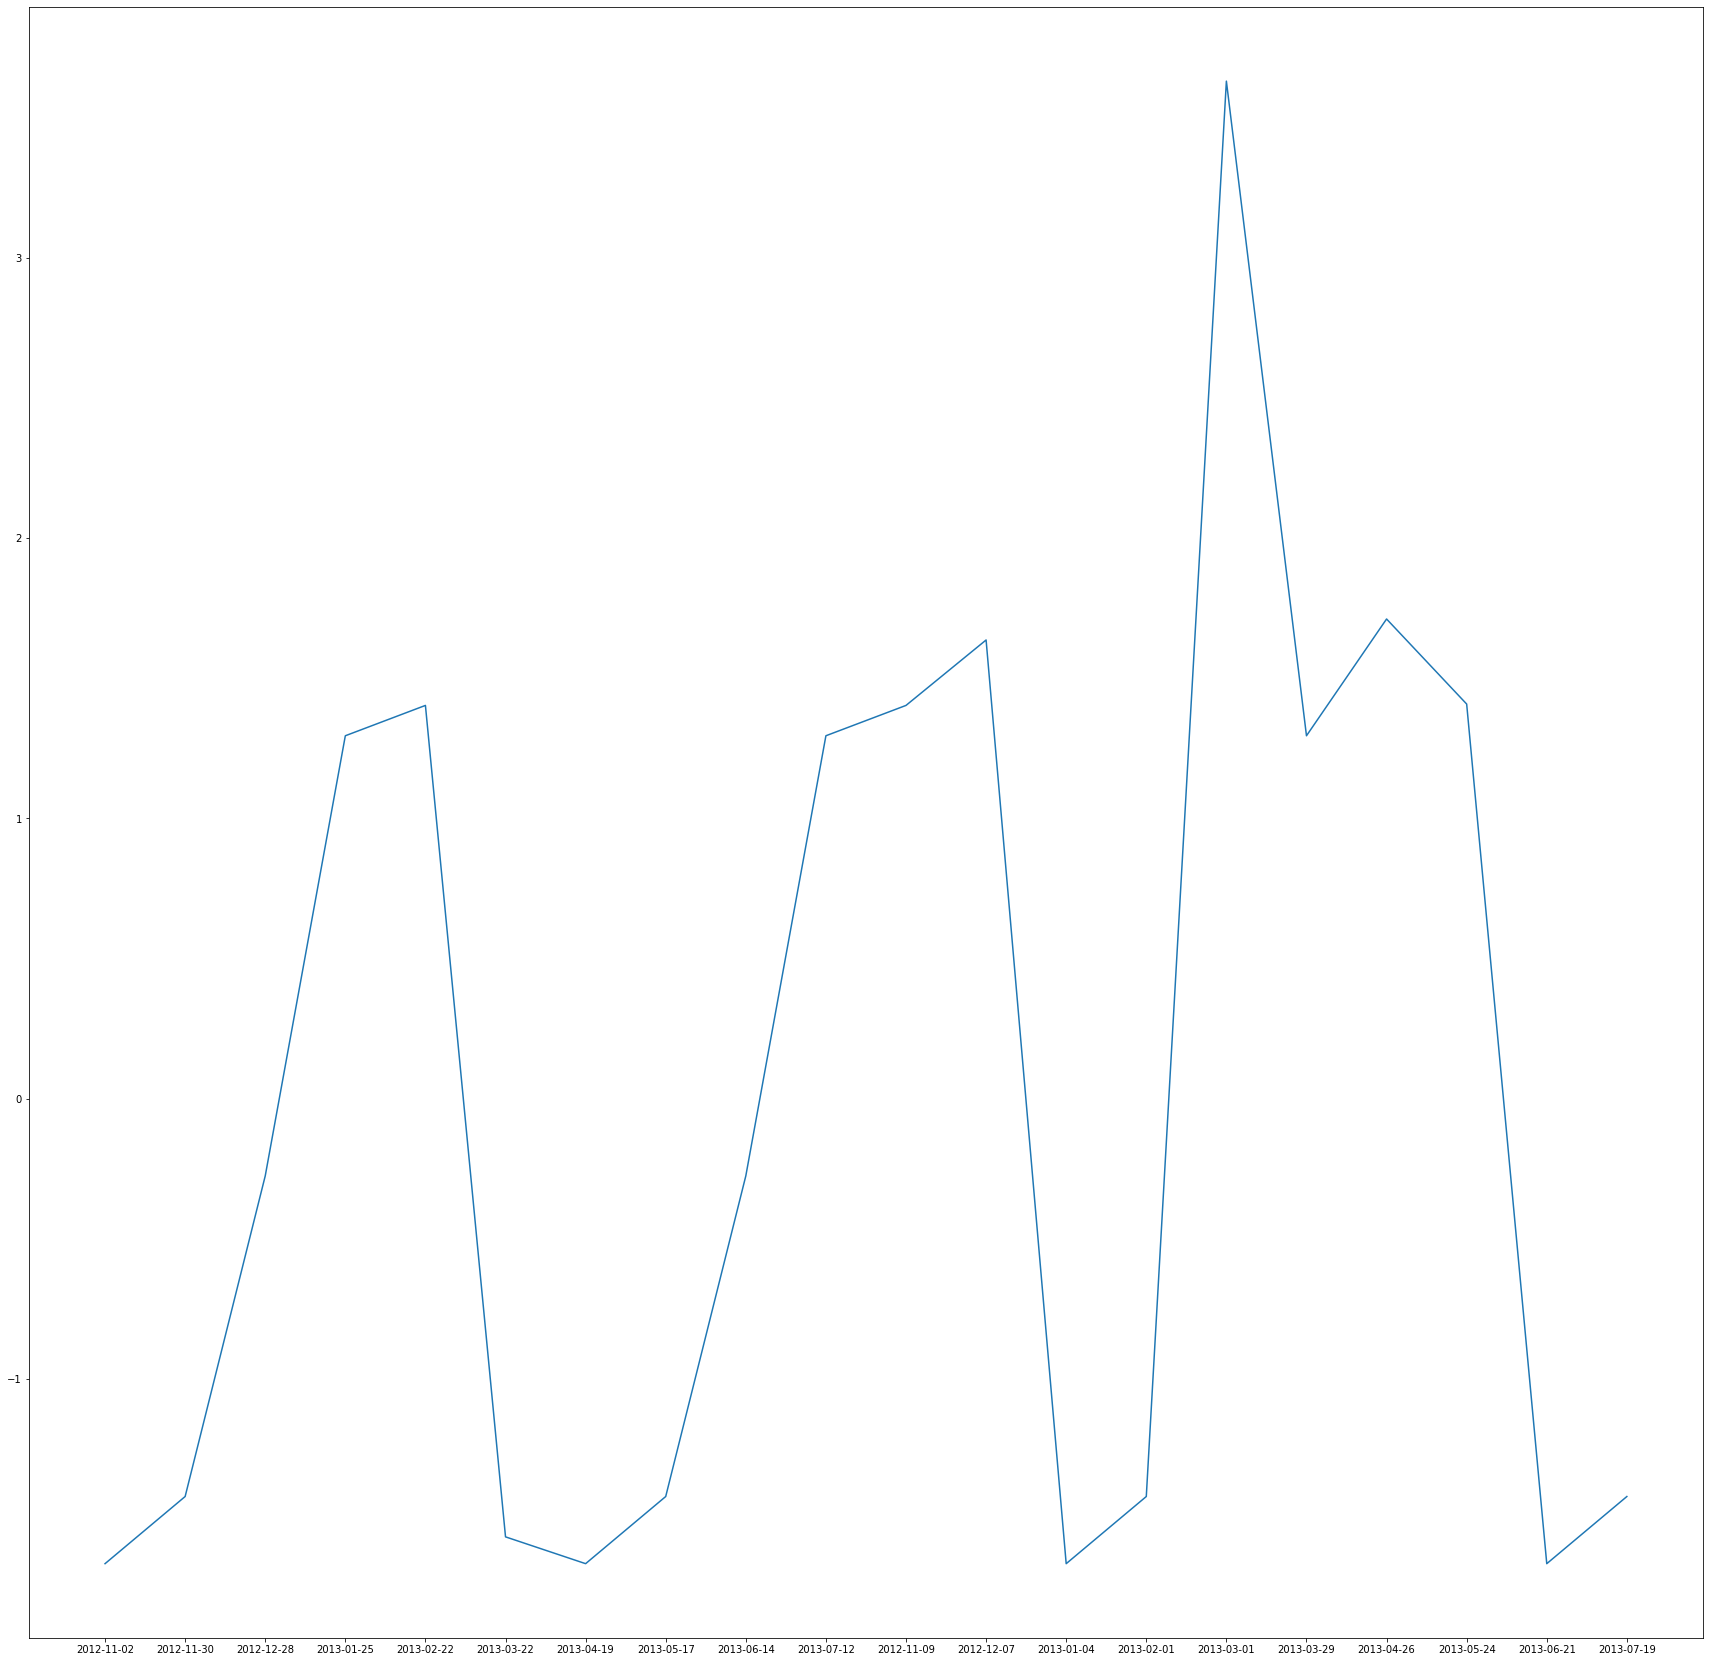

In [87]:
##approximately monthly sales
plt.figure(0, figsize = [30,30])
plt.plot(month[:20] , test_month[:20])
plt.show()